# Data Dictionary

* **survival: **  Survival        0 = No, 1 = Yes           
* **pclass: **    Ticket class    1 = 1st, 2 = 2nd, 3 = 3rd
* **sex: **       Sex                                       
* **Age: ** 	    Age in years 	
* **sibsp: **     # of siblings / spouses aboard the Titanic 	
* **parch: **     # of parents / children aboard the Titanic 	
* **ticket: **    Ticket number 	
* **fare: **      Passenger fare 	
* **cabin: **     Cabin number 	
* **embarked: **  Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

In [312]:
import sys

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

#print "TensorFlow version: ", tf.__version__

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

def null_table(training, testing):
    print("Training Data Frame")
    print(pd.isnull(training).sum()) 
    print(" ")
    print("Testing Data Frame")
    print(pd.isnull(testing).sum())
    pass
    
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

#print list(train_data.columns.values)

print color.BOLD + 'Dimensions train dataset: ' + color.END, train_data.shape
print color.BOLD + 'Dimensions test dataset: ' + color.END, test_data.shape

#print color.BOLD + 'Train dataset NULL values per column: ' + color.END
trainNullValuesPerColumn = train_data.isnull().sum()
#print trainNullValuesPerColumn
print (color.BOLD + 'Null values in datasets: ' + color.END)
null_table(train_data, test_data)


Dimensions train dataset:  (891, 12)
Dimensions test dataset:  (418, 11)
Null values in datasets: 
Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [313]:
train_data_2 = train_data
test_data_2 = test_data

# Fill in the missing values for the 'Age' 
First we analize the distribution of the data

('Age mean: ', 29.69911764705882)
('Age median: ', 28.0)


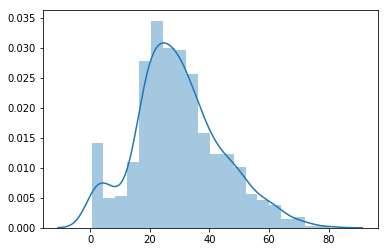

In [314]:
ageCopy = train_data_2['Age'].copy()
ageCopy.dropna(inplace=True)
sns.distplot(ageCopy.values)
print ("Age mean: ", np.mean(ageCopy.values))
print ("Age median: ", np.median(ageCopy.values))

In [315]:
#the median will be an acceptable value to place in the Age NaN cells
# We choose the median because it represents the real medium value of the data and it's not skewed by off values
train_data_2["Age"].fillna(train_data_2["Age"].median(), inplace = True)
test_data_2["Age"].fillna(train_data_2["Age"].median(), inplace = True) 

null_table(train_data_2, test_data_2)

print color.BOLD + 'Dimensions train dataset: ' + color.END, train_data_2.shape
print color.BOLD + 'Dimensions test dataset: ' + color.END, test_data_2.shape

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
Dimensions train dataset:  (891, 12)
Dimensions test dataset:  (418, 11)


# Fill in the missing values for the 'Embarqued' column

In [316]:
embarkedCopy = train_data_2['Embarked'].copy()

embarkedCopy.unique()

array(['S', 'C', 'Q', nan], dtype=object)

('Embarked mean: ', 1.3622047244094488)
('Embarked median: ', 1.0)


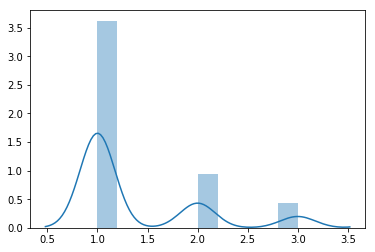

In [317]:
# Replace the city codes for numbers to be able to plot them
embarkedCopy = embarkedCopy.astype("category")
embarkedCopy.cat.rename_categories({'S':1, 'C':2, 'Q':3}, inplace=True)
embarkedCopy.dropna(inplace=True)
sns.distplot(embarkedCopy.values)
print ("Embarked mean: ", np.mean(embarkedCopy.values))
print ("Embarked median: ", np.median(embarkedCopy.values))

In [318]:
# We fill in with 'S' because most of the passenger Embarked at this port
train_data_2["Embarked"].fillna("S", inplace = True)

null_table(train_data_2, test_data_2)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# Fill in the missing 'Fare' 

In [319]:
test_data_2[['Pclass', 'Embarked', 'Fare']].groupby(['Embarked', 'Pclass']).mean()

Fare
Embarked Pclass            
C        1       110.073511
         2        20.120445
         3        10.658700
Q        1        90.000000
         2        11.273950
         3         8.998985
S        1        76.677504
         2        23.056090
         3        13.913030

In [320]:
test_data_2[pd.isnull(test_data_2).any(axis=1)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [321]:
test_data_2.at[152, 'Fare'] = 13.913030

null_table(train_data_2, test_data_2)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


# Drop the 'Cabin' and 'Name' columns
Create another version of the dataset dropping the **Cabin** and the **Name** column and then removing the rows with NULL age

In [322]:
train_data_2 = train_data.drop(axis=1, columns=['Cabin', 'Name'])
test_data_2 = test_data.drop(axis=1, columns=['Cabin', 'Name'])

print ('Original Train: ', train_data.shape, ' - New Train: ', train_data_2.shape)
print ('Original Test: ', test_data.shape, ' - New Test: ', test_data_2.shape)

print color.BOLD + 'Dimensions train dataset: ' + color.END, train_data_2.shape
print color.BOLD + 'Dimensions test dataset: ' + color.END, test_data_2.shape

null_table(train_data_2, test_data_2)

('Original Train: ', (891, 12), ' - New Train: ', (891, 10))
('Original Test: ', (418, 11), ' - New Test: ', (418, 9))
Dimensions train dataset:  (891, 10)
Dimensions test dataset:  (418, 9)
Training Data Frame
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
 
Testing Data Frame
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# Convert the 'Ticket' column to more meaninful information
What I care about is that if some people share the same ticket I will assume they are part of the same family and then they might have had a better chance to be saved.
I'll extract that information by counting the people sharing the same ticket in a new column '**SharingSameTicket**'.

In [323]:
print ("TRAIN - ", "Total rows: ", train_data_2.shape[0], 
       'Number of unique tickets: ', len(train_data_2['Ticket'].unique()))
print ("TEST - ", "Total rows: ", test_data_2.shape[0], 
       'Number of unique tickets: ', len(test_data_2['Ticket'].unique()))

train_data_2 = train_data_2.join(train_data_2['Ticket'].value_counts(), on='Ticket', rsuffix='Count')
test_data_2 = test_data_2.join(test_data_2['Ticket'].value_counts(), on='Ticket', rsuffix='Count')

train_data_2 = train_data_2.drop(axis=1, columns=['Ticket'])
test_data_2 = test_data_2.drop(axis=1, columns=['Ticket'])

train_data_2.head(5)

print color.BOLD + 'Dimensions train dataset: ' + color.END, train_data_2.shape
print color.BOLD + 'Dimensions test dataset: ' + color.END, test_data_2.shape


('TRAIN - ', 'Total rows: ', 891, 'Number of unique tickets: ', 681)
('TEST - ', 'Total rows: ', 418, 'Number of unique tickets: ', 363)
Dimensions train dataset:  (891, 10)
Dimensions test dataset:  (418, 9)


# Convert the 'Sex' column to a one-hot-encoding

In [324]:
if 'Sex' in train_data_2.columns:
    train_data_2 = pd.get_dummies(train_data_2, columns=["Sex"])
    test_data_2 = pd.get_dummies(test_data_2, columns=["Sex"])

train_data_2.head(5)

print color.BOLD + 'Dimensions train dataset: ' + color.END, train_data_2.shape
print color.BOLD + 'Dimensions test dataset: ' + color.END, test_data_2.shape


Dimensions train dataset:  (891, 11)
Dimensions test dataset:  (418, 10)


# Convert the 'Embarqued' columns to a one-hot-encoding

In [325]:
if 'Embarked' in train_data_2.columns:
    train_data_2 = pd.get_dummies(train_data_2, columns=['Embarked'])
    test_data_2 = pd.get_dummies(test_data_2, columns=['Embarked'])

train_data_2.head(5)

print color.BOLD + 'Dimensions train dataset: ' + color.END, train_data_2.shape
print color.BOLD + 'Dimensions test dataset: ' + color.END, test_data_2.shape


Dimensions train dataset:  (891, 13)
Dimensions test dataset:  (418, 12)


# Drop the PassengerId column
This column doesn't add any valuable information for our analisys

In [326]:
train_data_2 = train_data_2.drop(axis=1, columns=['PassengerId'])
test_data_2 = test_data_2.drop(axis=1, columns=['PassengerId'])
train_data_2.head(5)

print color.BOLD + 'Dimensions train dataset: ' + color.END, train_data_2.shape
print color.BOLD + 'Dimensions test dataset: ' + color.END, test_data_2.shape

null_table(train_data_2, test_data_2)

Dimensions train dataset:  (891, 12)
Dimensions test dataset:  (418, 11)
Training Data Frame
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
TicketCount    0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64
 
Testing Data Frame
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
TicketCount    0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64


# Save cleaned and converted file to a new dataset file

In [329]:
if True:
    train_data_2.to_csv('data/train_final.csv', index=False)
    test_data_2.to_csv('data/test_final.csv', index=False)

    train_data_final = pd.read_csv("data/train_final.csv")
    test_data_final = pd.read_csv("data/test_final.csv")
    
    null_table(train_data_final, test_data_final)

print color.BOLD + 'Dimensions train dataset: ' + color.END, train_data_final.shape
print color.BOLD + 'Dimensions test dataset: ' + color.END, test_data_final.shape


Training Data Frame
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
TicketCount    0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64
 
Testing Data Frame
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
TicketCount    0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64
Dimensions train dataset:  (891, 12)
Dimensions test dataset:  (418, 11)
